In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import StandardScaler
RANDOM_STATE=1

In [75]:
data = pd.read_csv('Fifa2022-Males-1.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_10256\88336045.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Fifa2022-Males-1.csv')


In [76]:
data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,18913.000000,18913.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962,55.466187,55.466187
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563,14.676659,14.676659
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,14.000000,14.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000,50.000000,50.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000,59.000000,59.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000,65.000000,65.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000,92.000000,92.000000


In [77]:
data.shape

(19239, 104)

In [78]:
list(data.columns)

['sofifa_id',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'moveme

In [79]:
null_data = data.isna().sum().sort_values(ascending=False)
null_data = null_data.reset_index(drop = False)
null_data = null_data.rename(columns={"index": "Columns", 0: "Value"})
null_data['proportion'] = (null_data['Value'] / len(data)) * 100
null_data.head(10)

,Columns,Value,proportion
0,nation_jersey_number,18480,96.054889
1,nation_team_id,18480,96.054889
2,nation_position,18480,96.054889
3,club_loaned_from,18137,94.272052
4,player_tags,17798,92.510006
5,goalkeeping_speed,17107,88.918343
6,player_traits,9841,51.151307
7,passing,2132,11.081657
8,shooting,2132,11.081657
9,dribbling,2132,11.081657


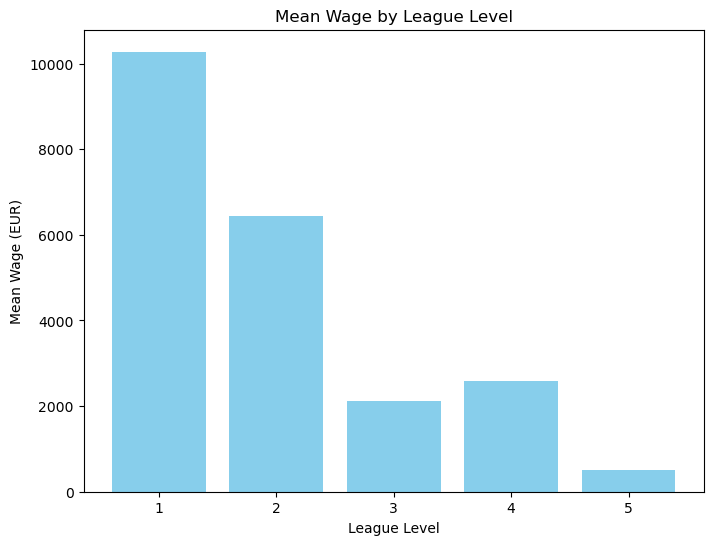

In [80]:
mean_wage_by_league = data.groupby('league_level')['wage_eur'].mean()

# Extract league levels and mean wages
league_levels = mean_wage_by_league.index
mean_wages = mean_wage_by_league.values

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(league_levels, mean_wages, color='skyblue')
plt.xlabel('League Level')
plt.ylabel('Mean Wage (EUR)')
plt.title('Mean Wage by League Level')
plt.show()

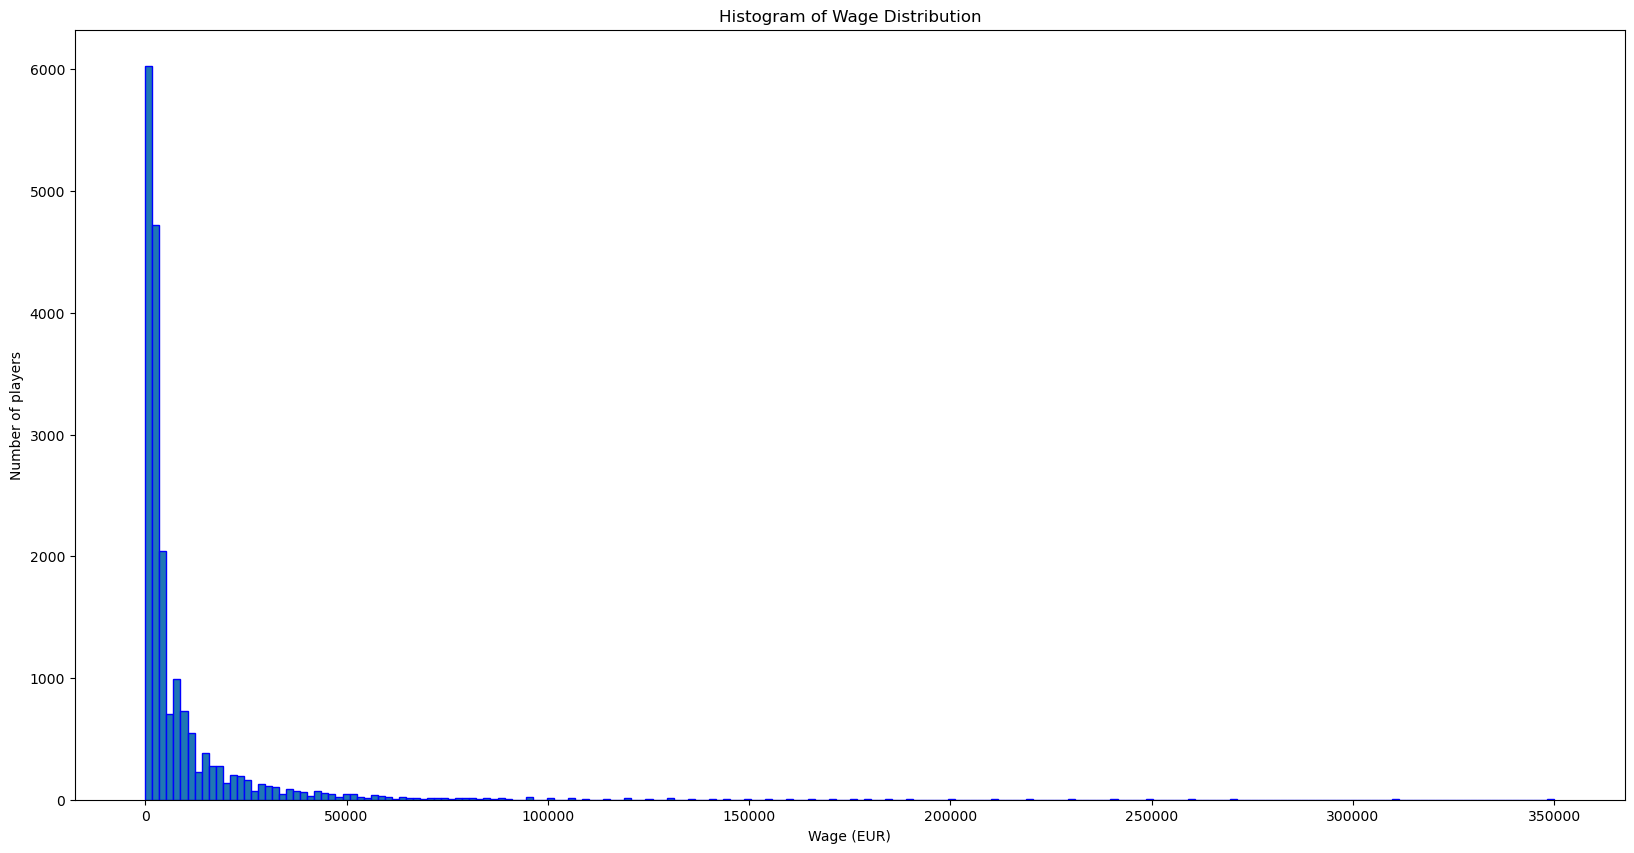

In [81]:
num_bins = 200

hist_range = (0, data['wage_eur'].max())

plt.figure(figsize=(20,10))
plt.hist(data['wage_eur'], bins=num_bins, range=hist_range, edgecolor='blue')

plt.xlabel('Wage (EUR)')
plt.ylabel('Number of players')
plt.title('Histogram of Wage Distribution')

plt.show()

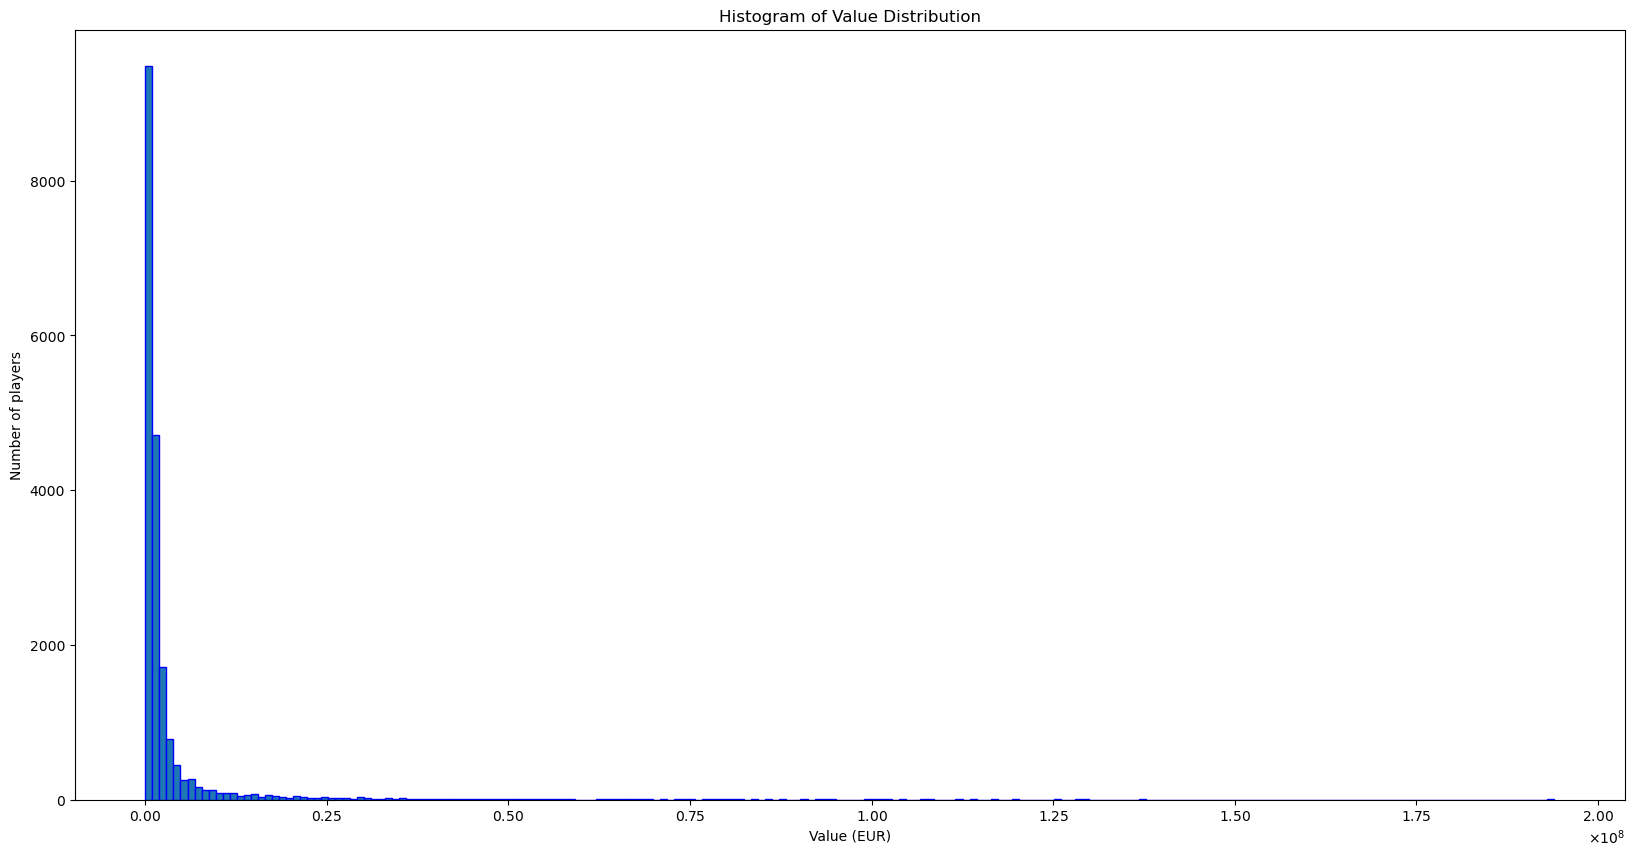

In [82]:
num_bins = 200

hist_range = (1, data['value_eur'].max())

plt.figure(figsize=(20,10))
plt.hist(data['value_eur'], bins=num_bins, range=hist_range, edgecolor='blue')

plt.xlabel('Value (EUR)')
plt.ylabel('Number of players')
plt.title('Histogram of Value Distribution')

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>],
       [<Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'league_level'}>]], dtype=object)

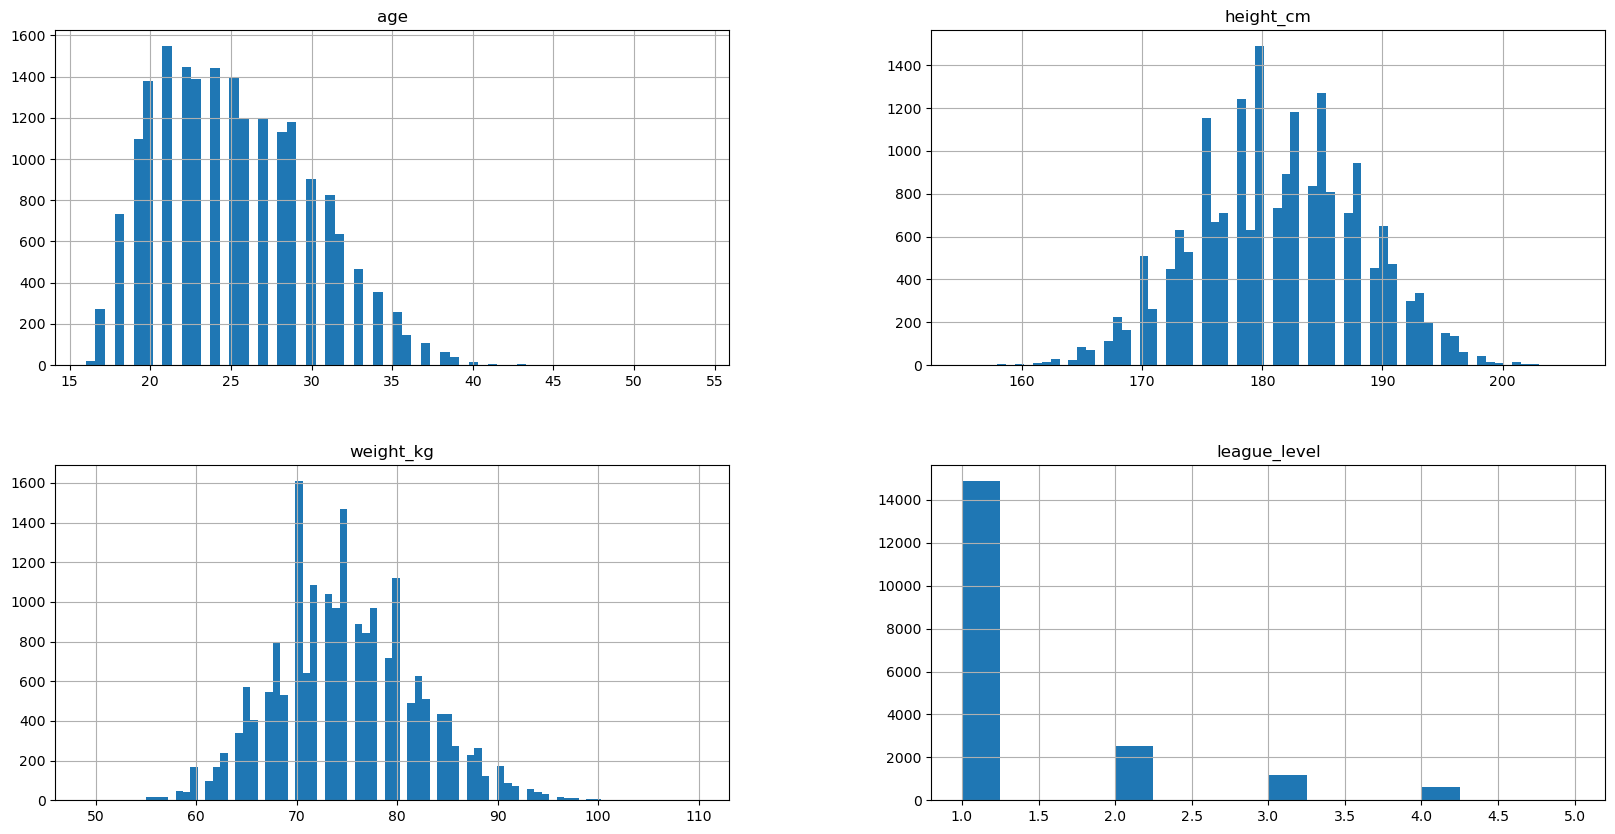

In [83]:
dataShort = data[['age', 'height_cm', 'weight_kg', 'league_level']]
dataShort.hist(bins='auto', figsize=(20, 10))

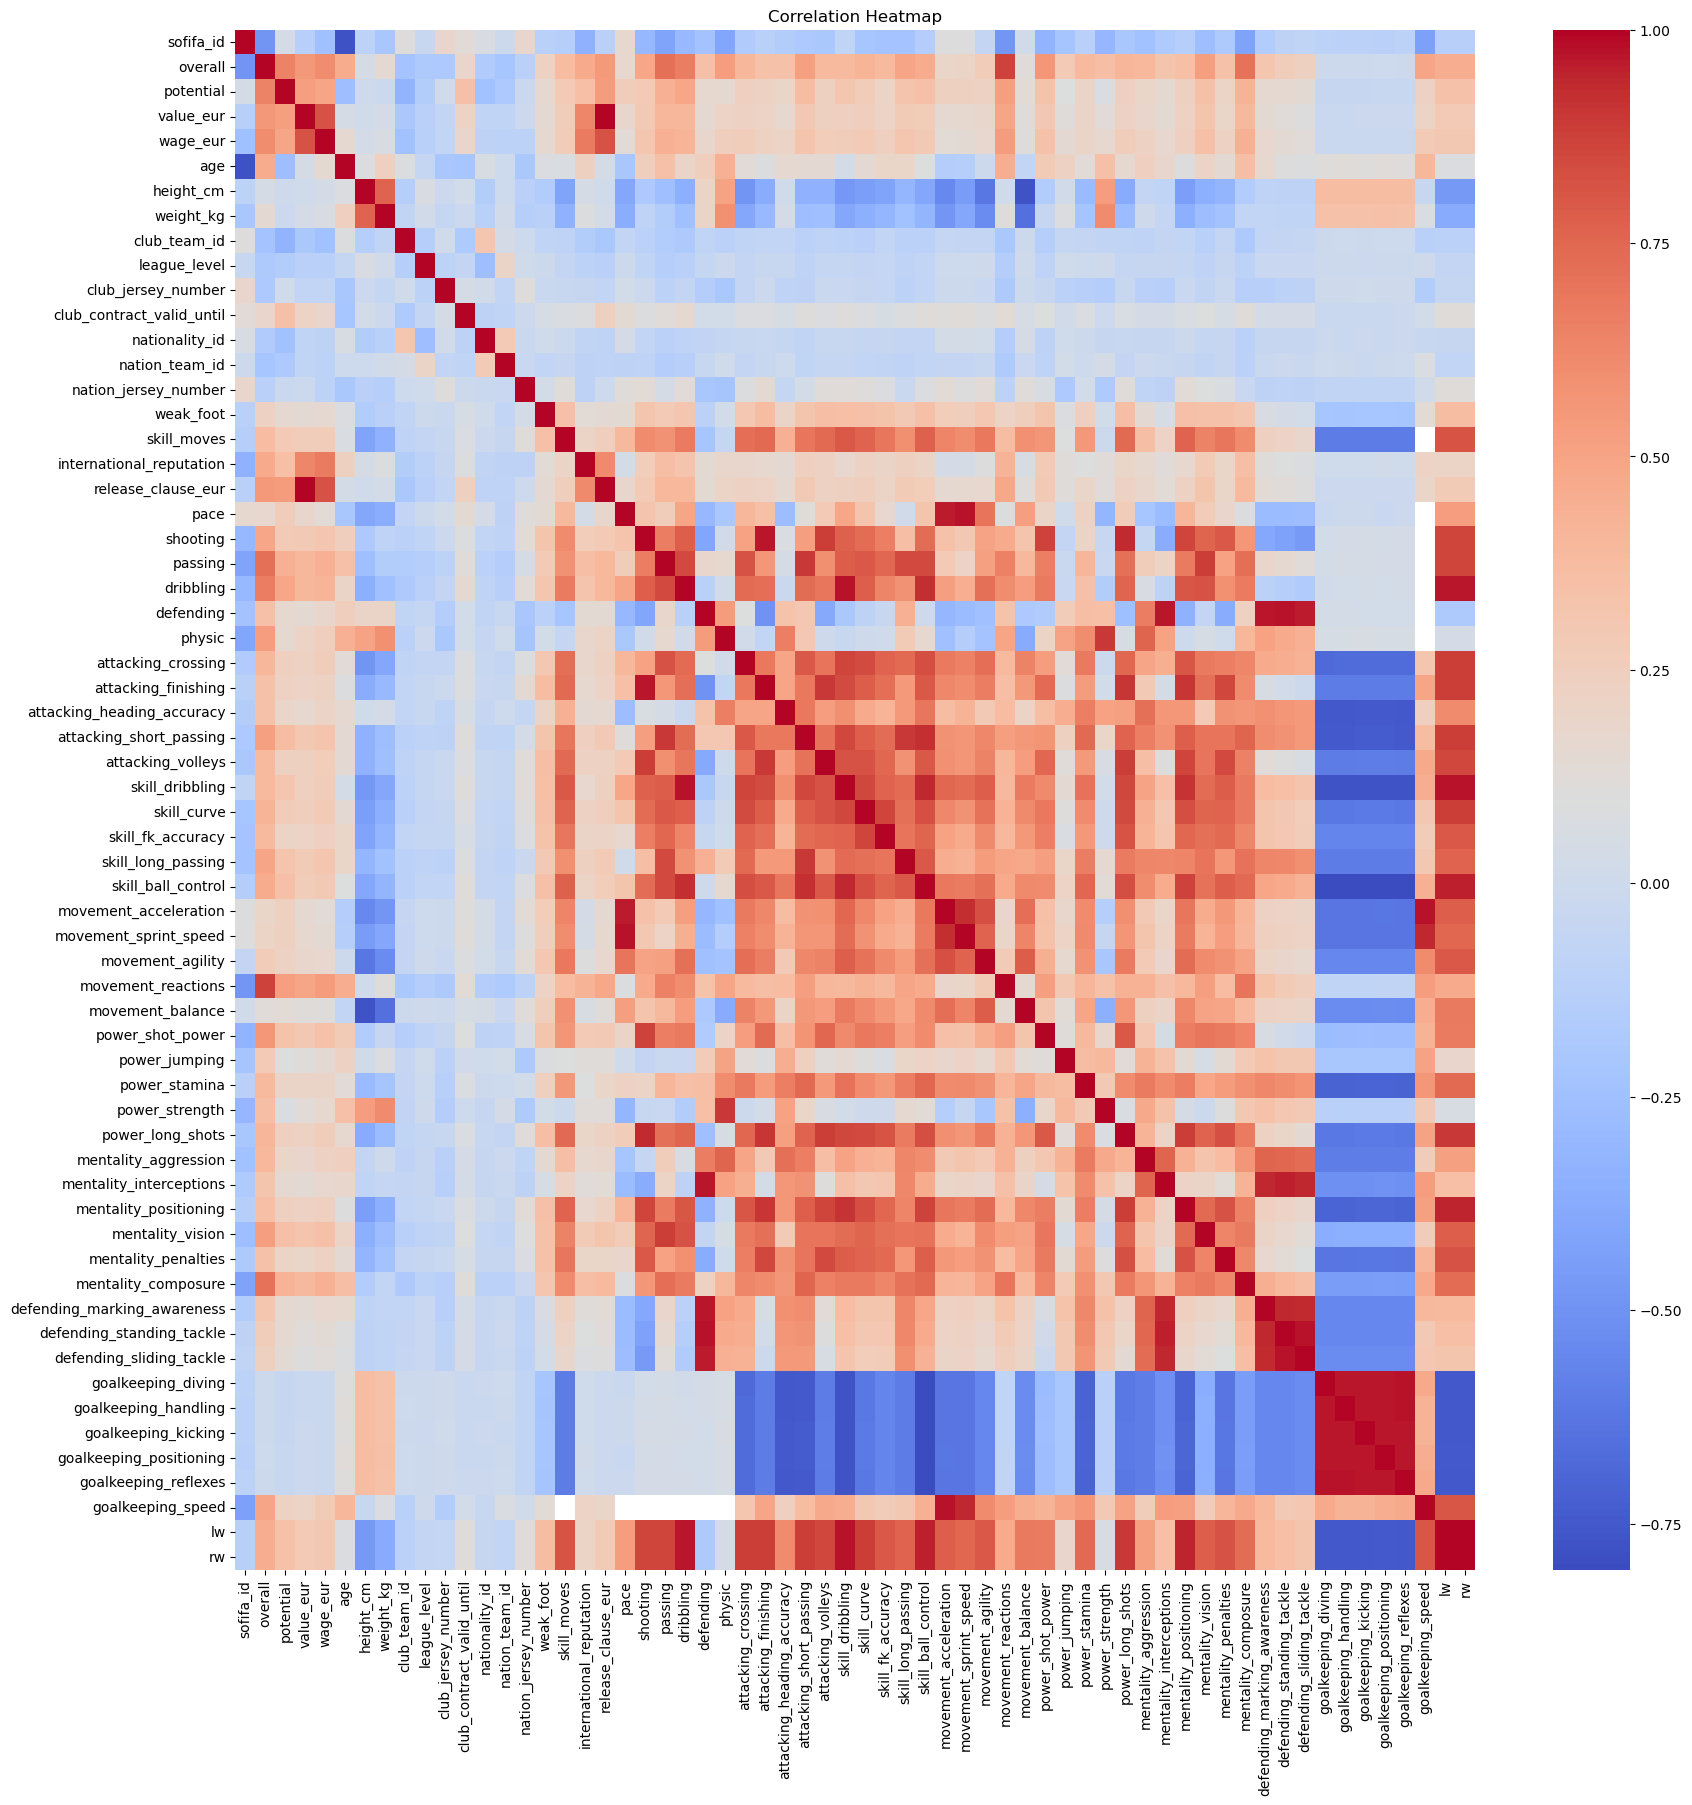

In [99]:
import seaborn as sns

dataNumeric = data.select_dtypes(include=['number'])

correlation_matrix = dataNumeric.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

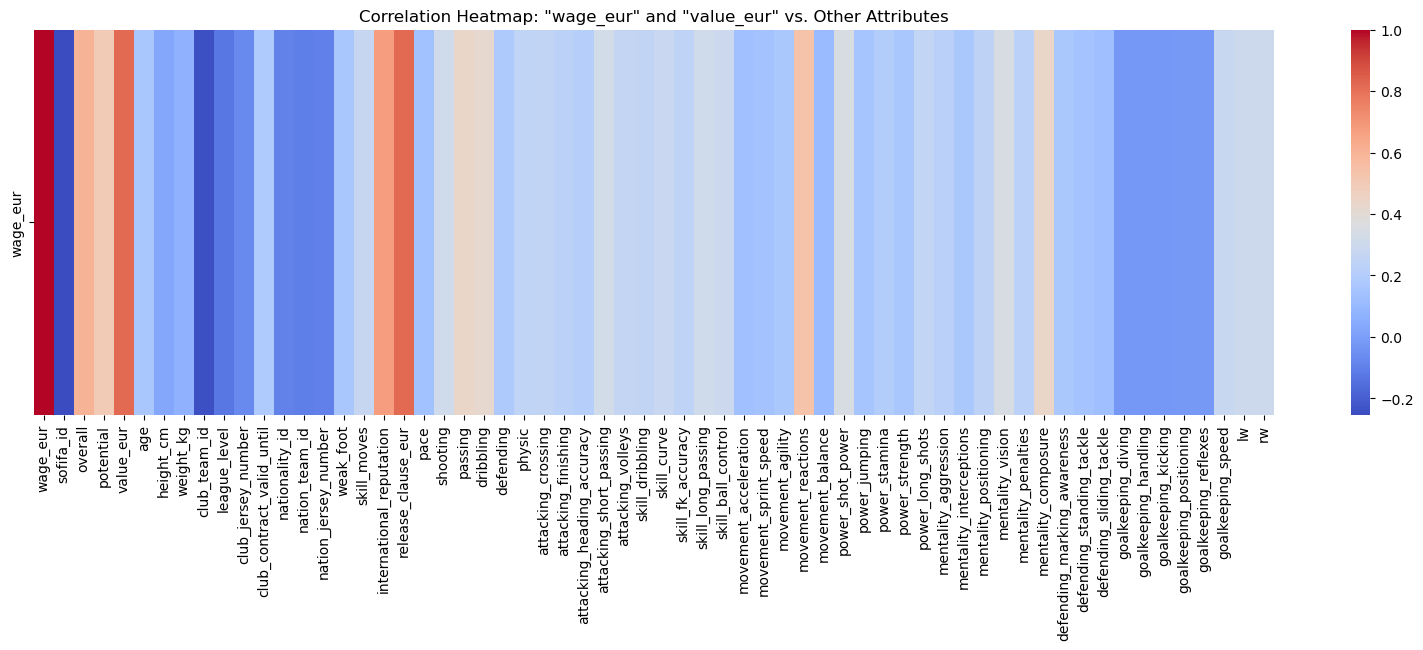

In [115]:
attributes_of_interest = ['wage_eur']
selected_attributes = attributes_of_interest + [col for col in dataNumeric.columns if col not in attributes_of_interest]

# Create a subset of the correlation matrix for the selected attributes
subset_correlation_matrix = correlation_matrix.loc[attributes_of_interest, selected_attributes]

# Create a heatmap for the subset correlation matrix
plt.figure(figsize=(20, 5))
sns.heatmap(subset_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: "wage_eur" and "value_eur" vs. Other Attributes')
plt.show()

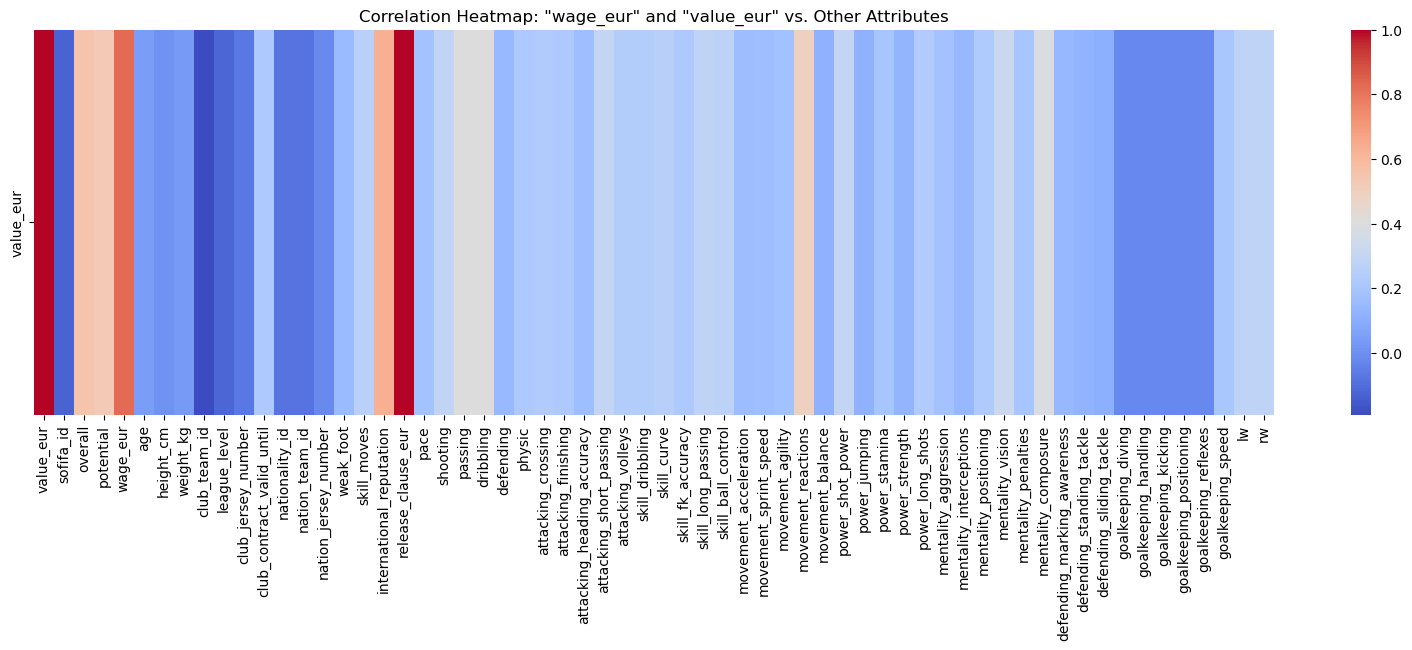

In [117]:
attributes_of_interest = ['value_eur']
selected_attributes = attributes_of_interest + [col for col in dataNumeric.columns if col not in attributes_of_interest]

# Create a subset of the correlation matrix for the selected attributes
subset_correlation_matrix = correlation_matrix.loc[attributes_of_interest, selected_attributes]

# Create a heatmap for the subset correlation matrix
plt.figure(figsize=(20, 5))
sns.heatmap(subset_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: "wage_eur" and "value_eur" vs. Other Attributes')
plt.show()

In [106]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top_10_correlations = corr_pairs.abs().sort_values(ascending=False).head(50)
top_10_correlations

rw                           lw                             1.000000
lw                           rw                             1.000000
release_clause_eur           value_eur                      0.995460
value_eur                    release_clause_eur             0.995460
defending                    defending_standing_tackle      0.977879
defending_standing_tackle    defending                      0.977879
                             defending_sliding_tackle       0.977414
defending_sliding_tackle     defending_standing_tackle      0.977414
rw                           skill_dribbling                0.974740
skill_dribbling              lw                             0.974740
                             rw                             0.974740
lw                           skill_dribbling                0.974740
goalkeeping_diving           goalkeeping_reflexes           0.973929
goalkeeping_reflexes         goalkeeping_diving             0.973929
goalkeeping_speed            movem

In [87]:
from sklearn.decomposition import PCA

# TODO: zrobić coś z NaN średnia czy coś albo 0
pca = PCA(random_state=RANDOM_STATE)
pca.fit_transform(dataNumeric)
n_components = len(pca.components_)
pca_cols = [f'PC{x+1}' for x in range(n_components)]
df_pca_components = pd.DataFrame(data = np.transpose(pca.components_), columns=pca_cols, index=dataNumeric.columns)
df_pca_components

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values